<a href="https://colab.research.google.com/github/Loismills/group23._FinalProject/blob/main/FinalProjectgroup23ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [284]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing relevant libraries


In [285]:
pip install scikeras

In [286]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.preprocessing import  LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras import Model
from scikeras.wrappers import KerasClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
import pickle

**Importing the relevant datasets**

In [287]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Toddler Autism dataset July 2018.csv')

In [288]:
data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [289]:
data = data.drop('Case_No', axis =1) #dropping unnecessary variables such a Case_No as it does not contribute to the final result

*Dropping the Qchat-10-Score as it performs the same role aas the dependent variable and may lead to bias*

In [290]:
data = data.drop('Qchat-10-Score', axis = 1)

In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1                      1054 non-null   int64 
 1   A2                      1054 non-null   int64 
 2   A3                      1054 non-null   int64 
 3   A4                      1054 non-null   int64 
 4   A5                      1054 non-null   int64 
 5   A6                      1054 non-null   int64 
 6   A7                      1054 non-null   int64 
 7   A8                      1054 non-null   int64 
 8   A9                      1054 non-null   int64 
 9   A10                     1054 non-null   int64 
 10  Age_Mons                1054 non-null   int64 
 11  Sex                     1054 non-null   object
 12  Ethnicity               1054 non-null   object
 13  Jaundice                1054 non-null   object
 14  Family_mem_with_ASD     1054 non-null   object
 15  Who 

Variable in Dataset	Corresponding Q-chat-10-Toddler Features
1. A1	 Does your child look at you when you call his/her name?


2. A2	How easy is it for you to get eye contact with your child?

3. A3	Does your child point to indicate that s/he wants something? (e.g. a toy that is
out of reach)

4. A4	Does your child point to share interest with you? (e.g. pointing at an
interesting sight)

5. A5	Does your child pretend? (e.g. care for dolls, talk on a toy phone)

6. A6	Does your child follow where you’re looking?

7. A7	If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g. stroking hair, hugging them)

8. A8	Would you describe your child’s first words as:

9. A9	Does your child use simple gestures? (e.g. wave goodbye)

10. A10	Does your child stare at nothing with no apparent purpose?





In [292]:
data
comparison_data = data

*Checking for any missing variables in the dataset*

In [293]:
pd.DataFrame(data.isnull().sum(), columns=["Missing Values"]).style.bar(color = "#84A9AC")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:4165: RuntimeWarning: invalid value encountered in long_scalars
  end = (x - left) / (right - left)


,Missing Values
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0
A10,0


*Creating a dataframe that shows all the objects in the dataframe and their unique values and count*

In [294]:
object_cols = data.select_dtypes('O').columns

object_df = pd.DataFrame({
    'Objects': object_cols,
    'Unique values': [data[col].unique() for col in object_cols],
    'number of unique values':[data[col].nunique()for col in object_cols]
})

object_df

,Objects,Unique values,number of unique values
0,Sex,"[f, m]",2
1,Ethnicity,"[middle eastern, White European, Hispanic, bla...",11
2,Jaundice,"[yes, no]",2
3,Family_mem_with_ASD,"[no, yes]",2
4,Who completed the test,"[family member, Health Care Professional, Heal...",5
5,Class/ASD Traits,"[No, Yes]",2


*Standardizing the unique values of the objects in the dataset*

In [295]:
replacements = {
    'f' : 'F',
    'm' : 'M'

}
data['Sex'] = data['Sex'].replace(replacements)

In [296]:
replacements = {
    'yes' : 'Yes',
    'no' : 'No'

}
data['Jaundice'] = data['Jaundice'].replace(replacements)

In [297]:
replacements = {
    'yes' : 'Yes',
    'no' : 'No'

}
data['Family_mem_with_ASD'] = data['Family_mem_with_ASD'].replace(replacements)

In [298]:
unique_values = data['Who completed the test'].unique()
unique_values

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [299]:
replacements = {
    'family member' : 'Family Member'

}
data['Who completed the test'] = data['Who completed the test'].replace(replacements)

In [300]:
unique_values = data['Ethnicity'].unique()

unique_values

array(['middle eastern', 'White European', 'Hispanic', 'black', 'asian',
       'south asian', 'Native Indian', 'Others', 'Latino', 'mixed',
       'Pacifica'], dtype=object)

In [301]:
replacements = {
    'middle eastern': 'Middle Eastern',
    'mixed': 'Mixed',
    'asian': 'Asian',
    'black': 'Black',
    'south asian': 'South Asian',

}
data['Ethnicity'] = data['Ethnicity'].replace(replacements)

In [302]:
object_cols = data.select_dtypes('O').columns

object_df = pd.DataFrame({
    'Objects': object_cols,
    'Unique values': [data[col].unique() for col in object_cols],
    'number of unique values':[data[col].nunique()for col in object_cols]
})

object_df

,Objects,Unique values,number of unique values
0,Sex,"[F, M]",2
1,Ethnicity,"[Middle Eastern, White European, Hispanic, Bla...",11
2,Jaundice,"[Yes, No]",2
3,Family_mem_with_ASD,"[No, Yes]",2
4,Who completed the test,"[Family Member, Health Care Professional, Heal...",5
5,Class/ASD Traits,"[No, Yes]",2


In [303]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,F,Middle Eastern,Yes,No,Family Member,No
1,1,1,0,0,0,1,1,0,0,0,36,M,White European,Yes,No,Family Member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,M,Middle Eastern,Yes,No,Family Member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,M,Hispanic,No,No,Family Member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,F,White European,No,Yes,Family Member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,F,White European,No,Yes,Family Member,No
1050,0,0,1,1,1,0,1,0,1,0,12,M,Black,Yes,No,Family Member,Yes
1051,1,0,1,1,1,1,1,1,1,1,18,M,Middle Eastern,Yes,No,Family Member,Yes
1052,1,0,0,0,0,0,0,1,0,1,19,M,White European,No,Yes,Family Member,No


**Seperating the categorical and numerical data from the dataset**

In [304]:
categorical = data.select_dtypes(include=['object'])

In [305]:
numerical =  data.select_dtypes(include=['int'])

In [306]:
categorical

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,F,Middle Eastern,Yes,No,Family Member,No
1,M,White European,Yes,No,Family Member,Yes
2,M,Middle Eastern,Yes,No,Family Member,Yes
3,M,Hispanic,No,No,Family Member,Yes
4,F,White European,No,Yes,Family Member,Yes
...,...,...,...,...,...,...
1049,F,White European,No,Yes,Family Member,No
1050,M,Black,Yes,No,Family Member,Yes
1051,M,Middle Eastern,Yes,No,Family Member,Yes
1052,M,White European,No,Yes,Family Member,No


**Encoding categorical variables**

In [307]:
label_encoder = LabelEncoder()
for col in categorical.columns:
    data[col] = label_encoder.fit_transform(data[col])

In [308]:
np.save('classes.npy', label_encoder.classes_)

In [309]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,0,4,1,0,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,10,1,0,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,4,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,2,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,10,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,0,10,0,1,0,0
1050,0,0,1,1,1,0,1,0,1,0,12,1,1,1,0,0,1
1051,1,0,1,1,1,1,1,1,1,1,18,1,4,1,0,0,1
1052,1,0,0,0,0,0,0,1,0,1,19,1,10,0,1,0,0


# Feature Importance

In [310]:
print(data.columns)

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits '],
      dtype='object')


*Seperating the dependent variables from the independent variables*

In [311]:
y = data['Class/ASD Traits ']

In [312]:
data = data.drop('Class/ASD Traits ', axis=1)

*Using a random forest classifier to find the most important features*

In [313]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(data, y)

RandomForestClassifier(random_state=0)

In [314]:
feature_importance = model.feature_importances_
feature_names = data.columns

*Arranging the features in ascending order based on their importance*

In [315]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance = importance_df.sort_values(by='Importance', ascending=False)

In [316]:
feature_importance

,Feature,Importance
8,A9,0.148461
4,A5,0.130355
6,A7,0.124987
5,A6,0.121208
0,A1,0.097084
1,A2,0.077290
3,A4,0.071052
7,A8,0.053618
10,Age_Mons,0.045848
2,A3,0.036213


1. 1 - Sometimes, Rarely, Never
2. 0 - Usually, Always

1. A1	 Does your child look at you when you call his/her name?

2. A2	How easy is it for you to get eye contact with your child?

3. A3	Does your child point to indicate that s/he wants something? (e.g. a toy that is
out of reach)

4. A4	Does your child point to share interest with you? (e.g. pointing at an
interesting sight)

5. A5	Does your child pretend? (e.g. care for dolls, talk on a toy phone)

6. A6	Does your child follow where you’re looking?

7. A7	If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g. stroking hair, hugging them)

8. A8	Would you describe your child’s first words as:

9. A9	Does your child use simple gestures? (e.g. wave goodbye)

10. A10	Does your child stare at nothing with no apparent purpose?

*Using the Gradient Boosting Classifier to select important features*

In [317]:
model = GradientBoostingClassifier()
selector = SelectFromModel(model, threshold="median") #Only selecting features with values above the median value
selector = SelectFromModel(model)
X_selected = selector.fit_transform(data, y)

selected_indices = selector.get_support(indices=True)

selected_column_names = data.columns[selected_indices]

print(selected_column_names)


Index(['A1', 'A2', 'A5', 'A6', 'A7', 'A9'], dtype='object')


*Using Recursive Feature Elimination to select the 10 most important features*

In [318]:
model = GradientBoostingClassifier()
selector = RFE(model, n_features_to_select=10)
X_selected = selector.fit_transform(data, y)

In [319]:
selected_indices = selector.get_support(indices=True)

selected_column_names = data.columns[selected_indices]

selected_column_names

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'], dtype='object')

*Aftr analyzing we realized that all the features selecting using the 3 ways were similar and so selected our final features using the first 10 features from the random forest model*

In [320]:
features = feature_importance['Feature'].values[:10]
features

array(['A9', 'A5', 'A7', 'A6', 'A1', 'A2', 'A4', 'A8', 'Age_Mons', 'A3'],
      dtype=object)

# Exploratory Data Analysis

In [321]:
numerical = numerical.drop('Age_Mons', axis =1)

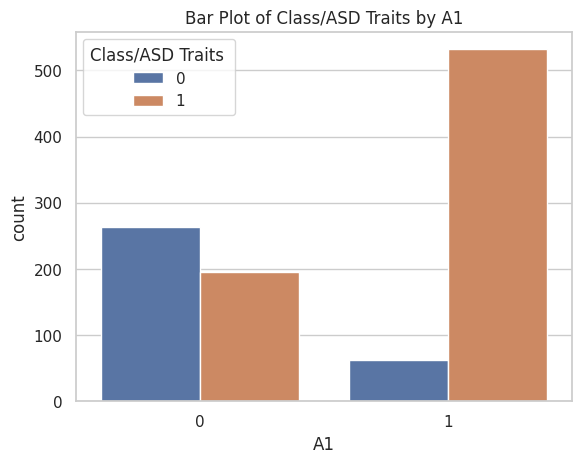

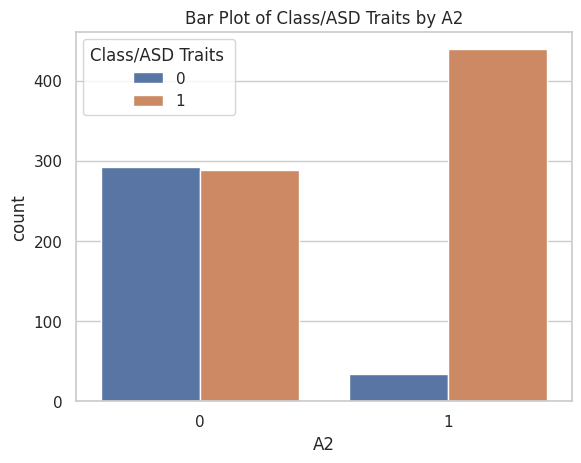

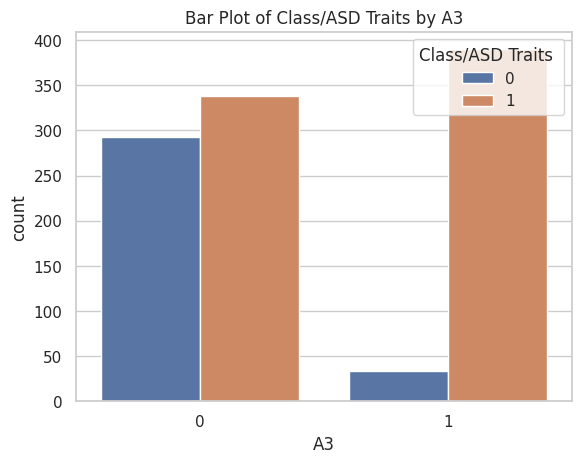

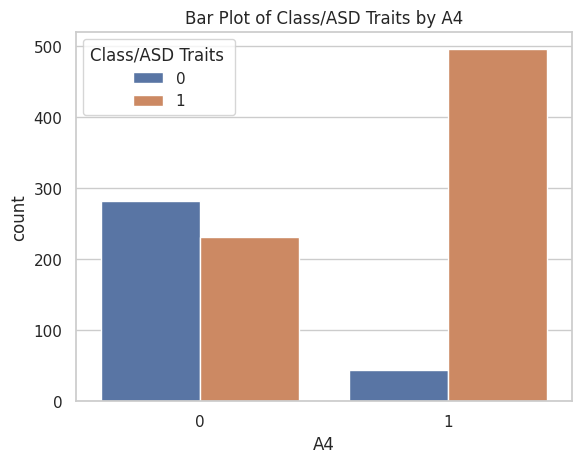

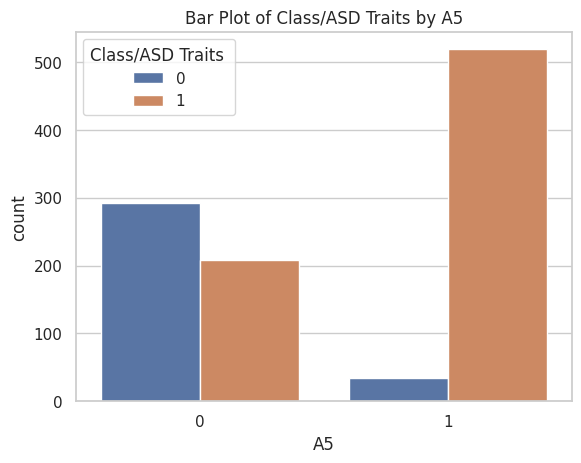

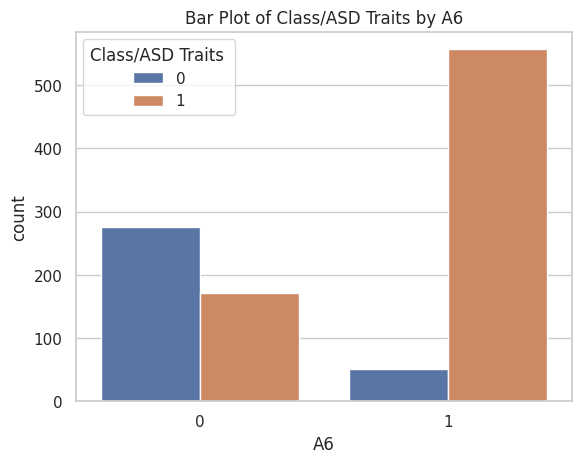

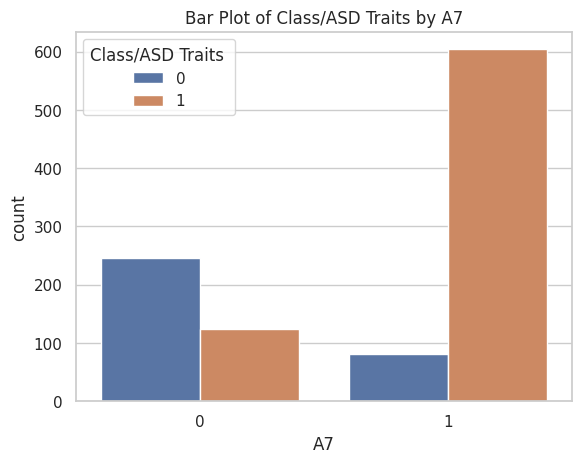

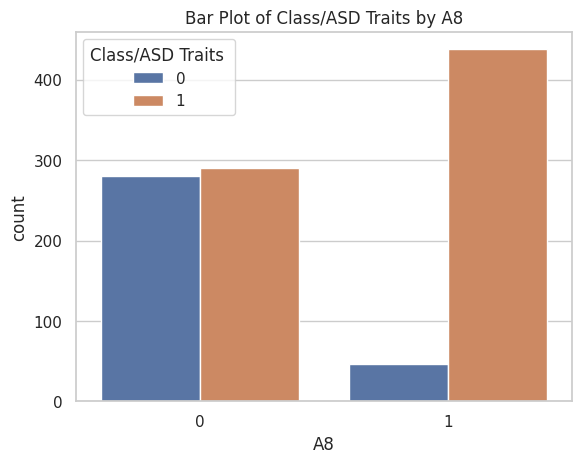

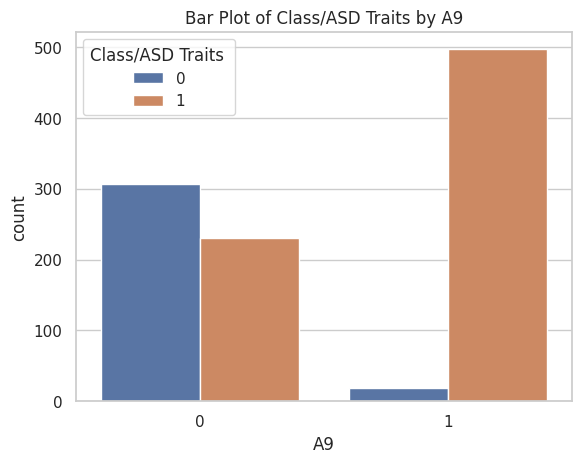

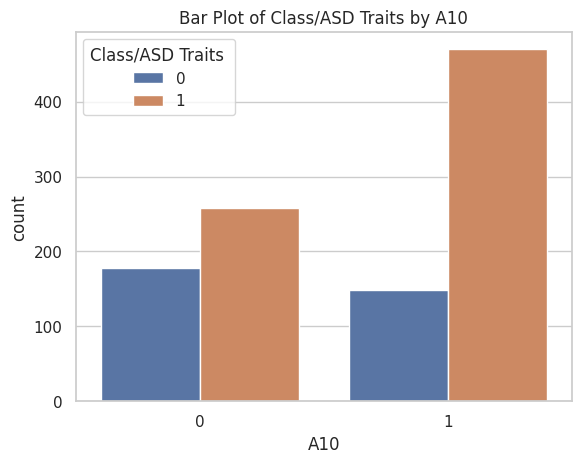

In [322]:
for i in numerical:
  sns.countplot(x=i, hue= 'Class/ASD Traits ', data=comparison_data)
  plt.title(f'Bar Plot of Class/ASD Traits by {i}')
  plt.show()

The graphs above show how the A1 to A10 variables influence the presence of ASD traits in toddlers



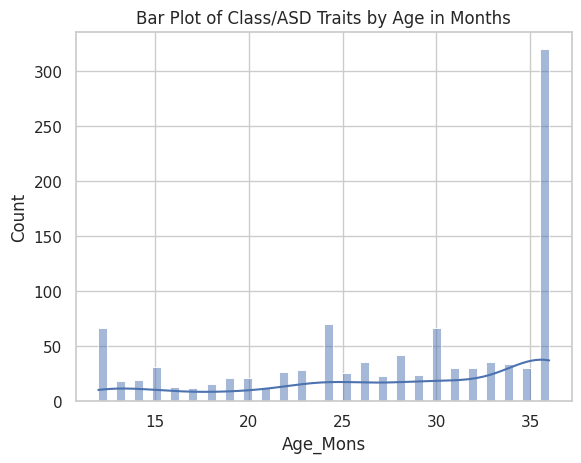

In [323]:
sns.histplot(data['Age_Mons'], bins=50, kde=True)
plt.title('Bar Plot of Class/ASD Traits by Age in Months')
plt.show()

Age is asymmetrically distributed

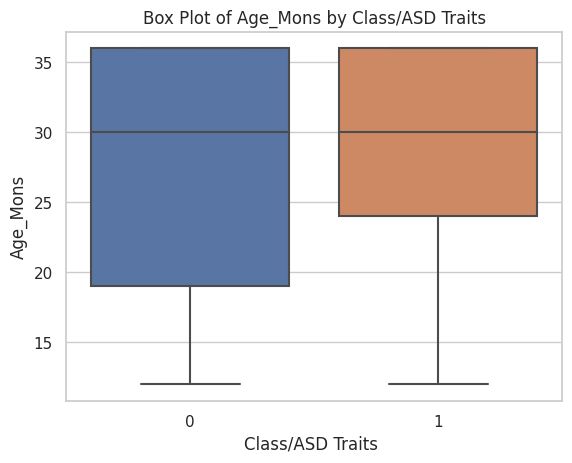

In [324]:
sns.boxplot(x='Class/ASD Traits ', y = 'Age_Mons', data = comparison_data)
plt.title(f'Box Plot of Age_Mons by Class/ASD Traits')
plt.show()

From the box plot it can be seen that higher ages are associated with Class/ASD Traits

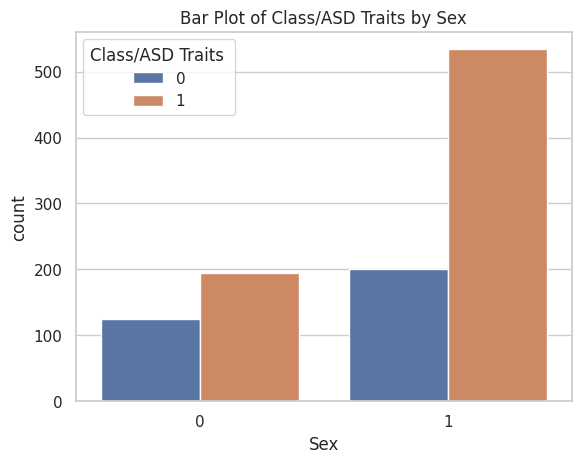

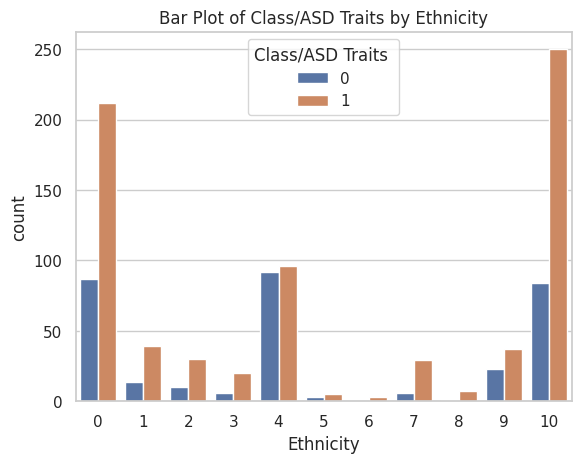

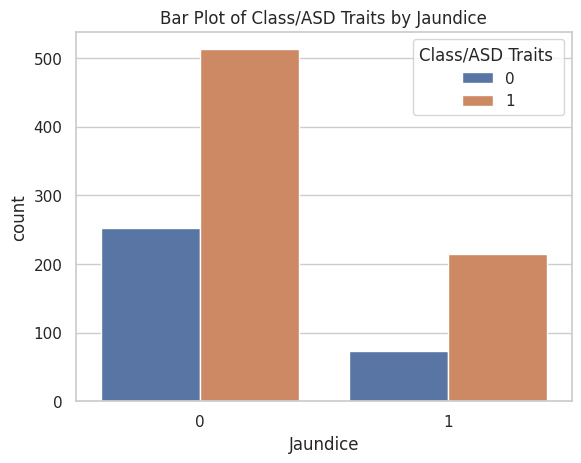

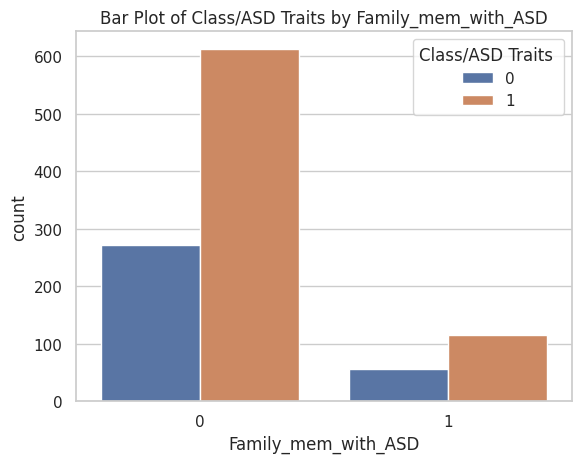

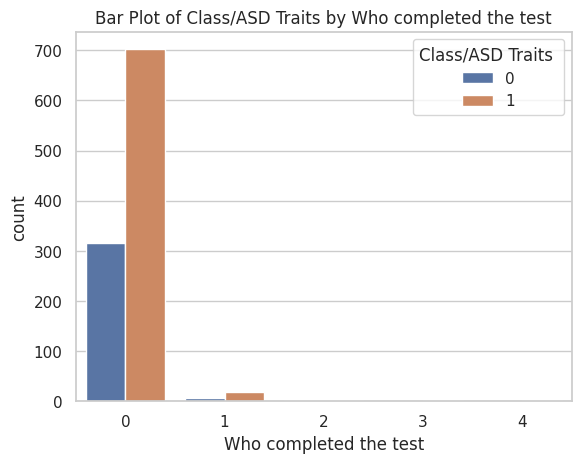

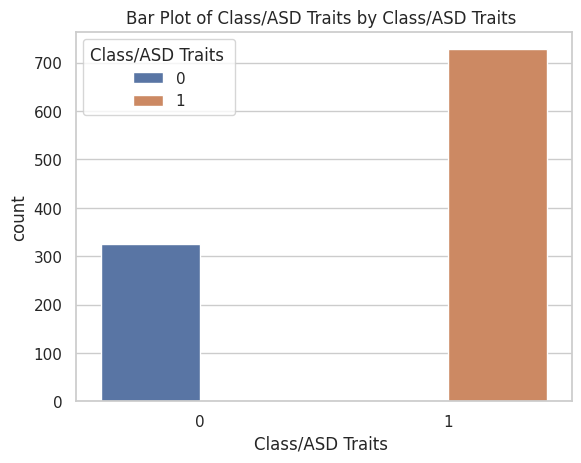

In [325]:
for i in categorical:
  sns.countplot(x=i, hue= 'Class/ASD Traits ', data=comparison_data)
  plt.title(f'Bar Plot of Class/ASD Traits by {i}')
  plt.show()

From the graphs above it can be seen that
1. Males had a higher chance of having ASD traits than females
2. Asians have a higher chance of havig ASD traits as compared to the other ethnicities
3. People who have not had jaundice have a higher chance of having ASD traits
4. People who have not had any family mebers with ASD traits have a higher chance of having them

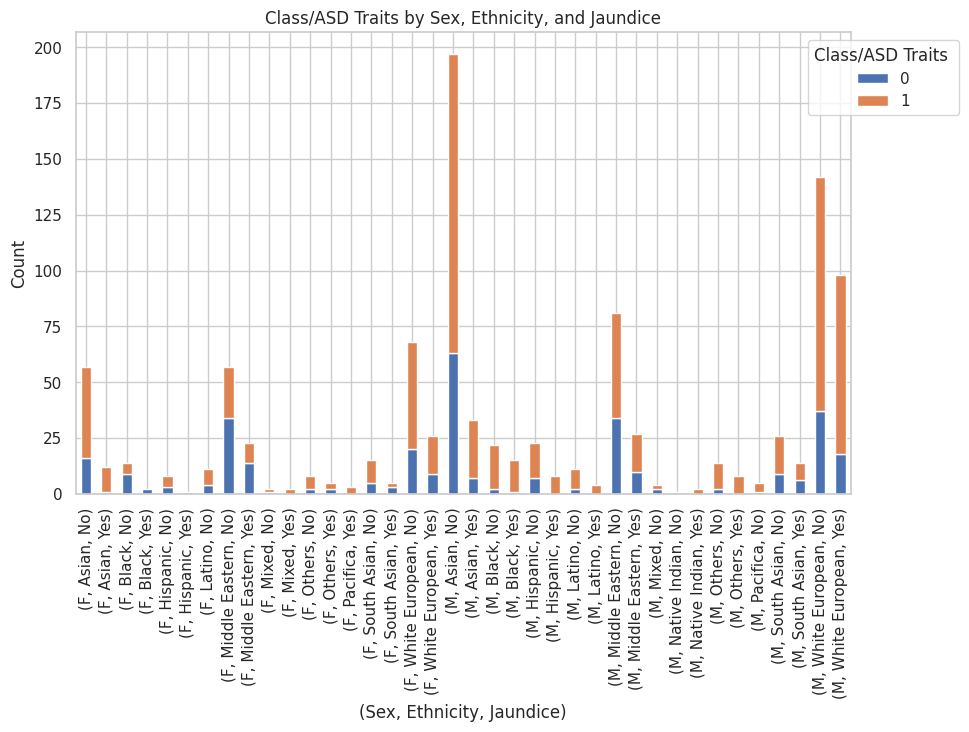

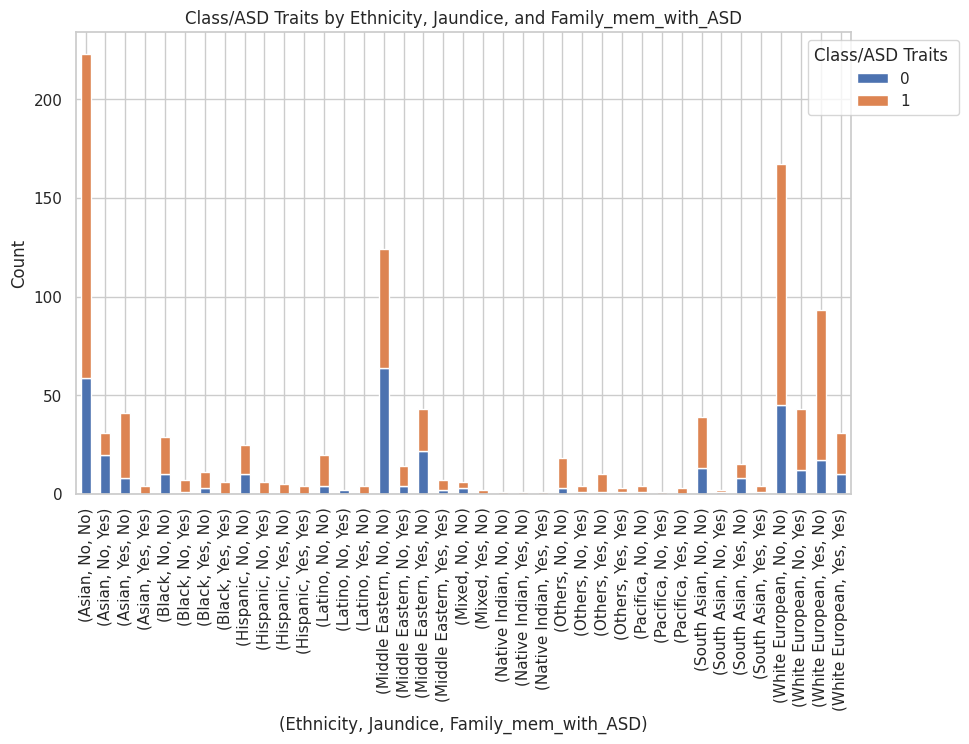

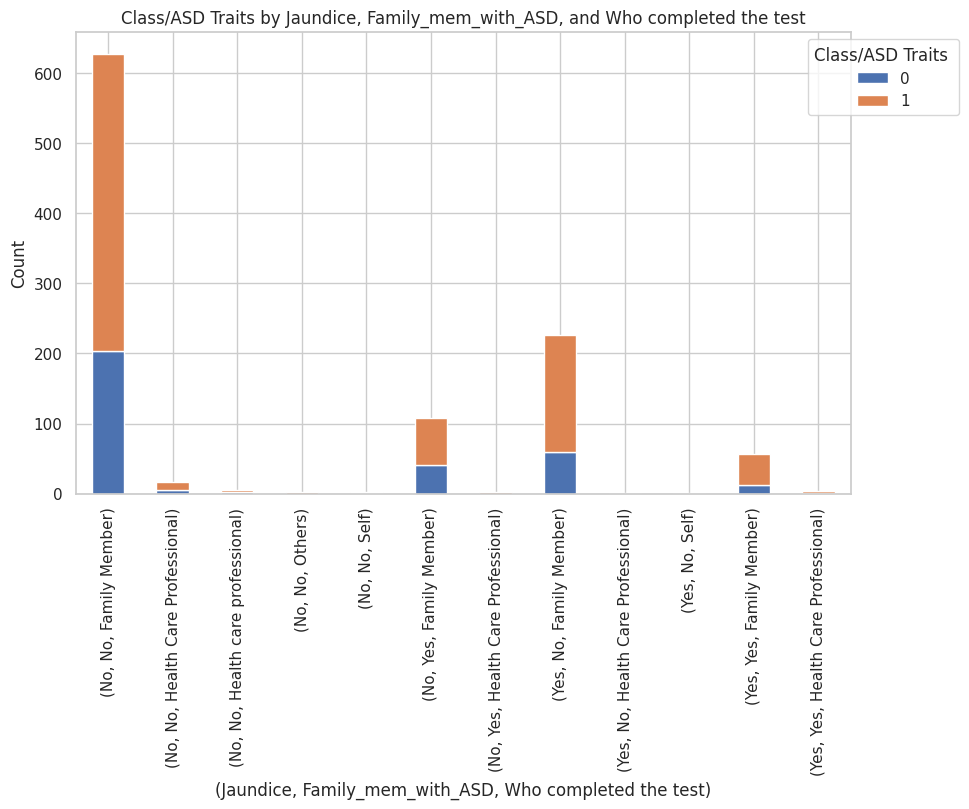

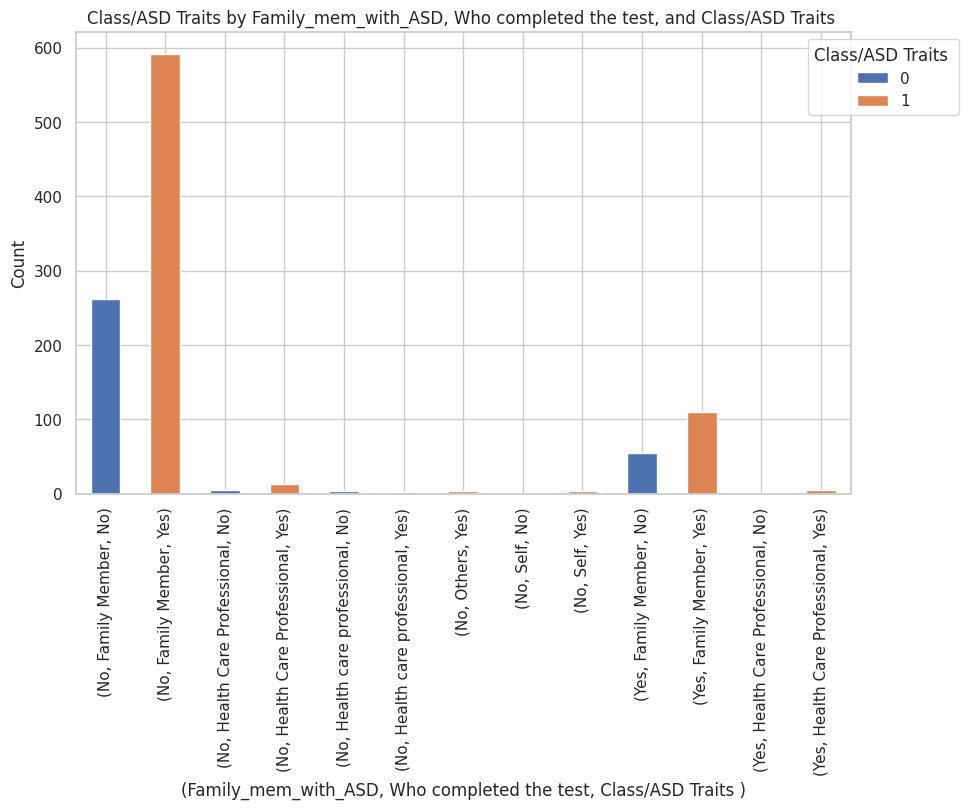

In [326]:
for i in range(len(categorical.columns)-2):
    cross_tab = pd.crosstab(index=[categorical.iloc[:, i], categorical.iloc[:, i+1], categorical.iloc[:, i+2]], columns=comparison_data['Class/ASD Traits '])
    sns.set(style='whitegrid')
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Class/ASD Traits by {categorical.columns[i]}, {categorical.columns[i+1]}, and {categorical.columns[i+2]}')
    plt.xlabel(f'({categorical.columns[i]}, {categorical.columns[i+1]}, {categorical.columns[i+2]})')
    plt.ylabel('Count')
    plt.legend(title='Class/ASD Traits ', loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()



Fom the above graphs it can be seen that people who were more likely to have CLass/ASD traits are
1. Asian males who did not have jaundice
2. Asians who did not have jaundice and had a family member complete the test
3. People who did not have jaundice and did not have any family with ASD and has a family member complete the test

In [327]:
X =data[features]

# Scaling selected variables

In [328]:
x = StandardScaler()

In [329]:
scaled = x.fit_transform(X)
data = pd.DataFrame(scaled, columns=X.columns)
X = data

*Saving the scaler for deployment*

In [330]:
with open('x.pkl', 'wb') as f:
    pickle.dump(x, f)

In [331]:
X

,A9,A5,A7,A6,A1,A2,A4,A8,Age_Mons,A3
0,-0.979340,-1.050615,0.733952,-1.167574,-1.136356,-0.902282,-1.024980,1.085212,0.016652,-0.818758
1,-0.979340,-1.050615,0.733952,0.856477,0.880006,1.108300,-1.024980,-0.921479,1.019590,-0.818758
2,-0.979340,-1.050615,0.733952,-1.167574,0.880006,-0.902282,-1.024980,1.085212,1.019590,-0.818758
3,1.021095,0.951823,0.733952,0.856477,0.880006,1.108300,0.975629,1.085212,-0.484817,1.221362
4,1.021095,0.951823,0.733952,0.856477,0.880006,1.108300,0.975629,1.085212,-0.986286,-0.818758
...,...,...,...,...,...,...,...,...,...,...
1049,-0.979340,-1.050615,-1.362486,-1.167574,-1.136356,-0.902282,-1.024980,-0.921479,-0.484817,-0.818758
1050,1.021095,0.951823,0.733952,-1.167574,-1.136356,-0.902282,0.975629,-0.921479,-1.989223,1.221362
1051,1.021095,0.951823,0.733952,0.856477,0.880006,-0.902282,0.975629,1.085212,-1.237020,1.221362
1052,-0.979340,-1.050615,-1.362486,-1.167574,0.880006,-0.902282,-1.024980,1.085212,-1.111653,-0.818758


*Splitting the data into training, validation
 and testing sets. We trained with 80% of our model and used the remaining 20% for testing*

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

*Creating a model for training using a Keras Functional API*

In [333]:
input_layer = Input(shape=(X_train.shape[1],))

*The model has 3 hidden layers and 3 parameters*(hidden_units, optimizer, activation)*

In [334]:
def create_model(hidden_units=32, optimizer='adam', activation = 'relu'):
    hidden_layer1 = Dense(hidden_units, activation=activation)(input_layer)
    hidden_layer2 = Dense(hidden_units, activation=activation)(hidden_layer1)
    hidden_layer3 = Dense(hidden_units, activation=activation)(hidden_layer2)

    outputs = Dense(1, activation='sigmoid')(hidden_layer3)

    model = Model(inputs=input_layer, outputs=outputs)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

*Specifying the number of epochs, batch size and hidden units that the model should use*

In [335]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=1, hidden_units = 32)

*Specifying the parameters that the model will take with all the possible options for optimization*

In [336]:
param_grid = {
    'optimizer': ['adam', 'rmsprop','adadelta'],
    'hidden_units': [32, 64, 128, 140]
}

*Using Grid Search and CV to train the keras model*

In [337]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [338]:
grid = GridSearchCV(estimator= model, param_grid=param_grid, cv=cv, scoring='accuracy')

*Training the model and printing out the best score and best parameters out of all the options in the param_grid*

In [339]:
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.5900 - accuracy: 0.7446
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4351 - accuracy: 0.8495
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3061 - accuracy: 0.9089
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2205 - accuracy: 0.9386
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1671 - accuracy: 0.9426
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1325 - accuracy: 0.9545
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.9584
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0946 - accuracy: 0.9663
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0827 - accuracy: 0.9683
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9723
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.6175 - accuracy: 0.7564
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4649 - accuracy: 0.9149
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.9248
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9446
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1429 - accuracy: 0.9505
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.9604
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0878 - accuracy: 0.9723
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9743
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9802
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9802
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 5ms/step - loss: 0.6502 - accuracy: 0.6462
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4616 - accuracy: 0.8992
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.3145 - accuracy: 0.9289
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.2166 - accuracy: 0.9328
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1629 - accuracy: 0.9387
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1306 - accuracy: 0.9506
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1109 - accuracy: 0.9585
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0954 - accuracy: 0.9664
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0844 - accuracy: 0.9664
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9684
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.6675 - accuracy: 0.6047
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.8419
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3676 - accuracy: 0.8913
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2714 - accuracy: 0.9328
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1961 - accuracy: 0.9387
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1457 - accuracy: 0.9526
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1158 - accuracy: 0.9625
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9644
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9644
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0757 - accuracy: 0.9664
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 2ms/step - loss: 0.5713 - accuracy: 0.8063
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3959 - accuracy: 0.9130
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2656 - accuracy: 0.9308
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.9387
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1459 - accuracy: 0.9407
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1223 - accuracy: 0.9427
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.9486
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0937 - accuracy: 0.9644
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0854 - accuracy: 0.9684
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0794 - accuracy: 0.9704
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 4ms/step - loss: 0.6492 - accuracy: 0.6891
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.8376
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.3646 - accuracy: 0.8931
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.2564 - accuracy: 0.9307
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1875 - accuracy: 0.9386
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1482 - accuracy: 0.9446
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1239 - accuracy: 0.9505
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1060 - accuracy: 0.9584
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.9683
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0844 - accuracy: 0.9683
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.7212 - accuracy: 0.4198
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.8772
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.9287
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2650 - accuracy: 0.9366
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9505
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1218 - accuracy: 0.9604
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.9703
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0831 - accuracy: 0.9743
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9802
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9822
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.6558 - accuracy: 0.6680
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4969 - accuracy: 0.8775
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.9308
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9407
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1571 - accuracy: 0.9526
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1190 - accuracy: 0.9565
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.9565
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0884 - accuracy: 0.9625
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0778 - accuracy: 0.9664
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0723 - accuracy: 0.9664
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.5907 - accuracy: 0.6957
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8182
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8834
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 0.9209
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1919 - accuracy: 0.9387
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.9526
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.9545
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0993 - accuracy: 0.9625
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0860 - accuracy: 0.9684
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.9664
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 5ms/step - loss: 0.6028 - accuracy: 0.6344
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4398 - accuracy: 0.7866
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.3284 - accuracy: 0.8834
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.2533 - accuracy: 0.9209
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1941 - accuracy: 0.9447
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1476 - accuracy: 0.9486
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1191 - accuracy: 0.9447
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1012 - accuracy: 0.9506
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0906 - accuracy: 0.9605
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0815 - accuracy: 0.9585
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.6210 - accuracy: 0.8099
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.9050
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.9327
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9406
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1450 - accuracy: 0.9465
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1155 - accuracy: 0.9485
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0987 - accuracy: 0.9525
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9624
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.9624
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9703
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.5762 - accuracy: 0.6950
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.7465
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3313 - accuracy: 0.8653
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2400 - accuracy: 0.9347
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1713 - accuracy: 0.9465
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9584
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1042 - accuracy: 0.9624
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0861 - accuracy: 0.9703
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9723
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.9762
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 5ms/step - loss: 0.5706 - accuracy: 0.7075
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4113 - accuracy: 0.8953
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.2954 - accuracy: 0.9269
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.2121 - accuracy: 0.9466
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1535 - accuracy: 0.9585
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1183 - accuracy: 0.9625
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0965 - accuracy: 0.9664
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0832 - accuracy: 0.9704
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0743 - accuracy: 0.9743
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0739 - accuracy: 0.9625
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 2ms/step - loss: 0.6861 - accuracy: 0.5336
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.7984
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8755
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3022 - accuracy: 0.9130
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2252 - accuracy: 0.9348
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.9427
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9486
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1130 - accuracy: 0.9565
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.9585
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0862 - accuracy: 0.9644
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.7355 - accuracy: 0.4881
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5113 - accuracy: 0.8360
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3603 - accuracy: 0.8814
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2538 - accuracy: 0.9170
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1871 - accuracy: 0.9190
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1491 - accuracy: 0.9348
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.9526
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.9506
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0952 - accuracy: 0.9625
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.9684
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 5ms/step - loss: 0.4969 - accuracy: 0.8653
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.2415 - accuracy: 0.9426
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1299 - accuracy: 0.9624
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0900 - accuracy: 0.9624
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0729 - accuracy: 0.9723
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0623 - accuracy: 0.9703
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0526 - accuracy: 0.9762
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0458 - accuracy: 0.9881
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0395 - accuracy: 0.9802
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 0.9881
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 5ms/step - loss: 0.5975 - accuracy: 0.7584
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.3555 - accuracy: 0.9030
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1959 - accuracy: 0.9485
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1208 - accuracy: 0.9564
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0881 - accuracy: 0.9644
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0679 - accuracy: 0.9743
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0595 - accuracy: 0.9802
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0507 - accuracy: 0.9842
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0444 - accuracy: 0.9842
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 0.9861
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.5216 - accuracy: 0.8103
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2889 - accuracy: 0.9190
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1631 - accuracy: 0.9427
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1118 - accuracy: 0.9585
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0919 - accuracy: 0.9625
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9723
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.9783
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9822
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9783
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9822
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.4871 - accuracy: 0.8439
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2692 - accuracy: 0.9249
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1480 - accuracy: 0.9565
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0954 - accuracy: 0.9704
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9723
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0589 - accuracy: 0.9802
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9802
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9862
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9881
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9862
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 5ms/step - loss: 0.5389 - accuracy: 0.7826
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.2832 - accuracy: 0.9466
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1472 - accuracy: 0.9664
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0997 - accuracy: 0.9664
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.9704
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0700 - accuracy: 0.9723
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0638 - accuracy: 0.9723
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9763
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.9802
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9842
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.5634 - accuracy: 0.7941
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2999 - accuracy: 0.9248
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1488 - accuracy: 0.9584
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.9604
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0761 - accuracy: 0.9723
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0642 - accuracy: 0.9723
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9782
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9762
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9782
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9881
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.5633 - accuracy: 0.7267
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.8970
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1927 - accuracy: 0.9426
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1211 - accuracy: 0.9505
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0849 - accuracy: 0.9762
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.9782
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9802
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9822
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9842
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9881
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 4ms/step - loss: 0.5233 - accuracy: 0.8458
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.2567 - accuracy: 0.9545
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1283 - accuracy: 0.9644
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0897 - accuracy: 0.9644
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0725 - accuracy: 0.9723
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0669 - accuracy: 0.9723
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0580 - accuracy: 0.9723
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0538 - accuracy: 0.9723
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0499 - accuracy: 0.9723
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0460 - accuracy: 0.9783
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.5613 - accuracy: 0.7352
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.8715
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1923 - accuracy: 0.9447
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1289 - accuracy: 0.9447
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.9585
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9605
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0681 - accuracy: 0.9743
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9783
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9802
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9783
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.5700 - accuracy: 0.8024
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3174 - accuracy: 0.9111
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1674 - accuracy: 0.9368
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1109 - accuracy: 0.9506
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0852 - accuracy: 0.9545
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9684
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9644
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9783
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9822
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9862
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 5ms/step - loss: 0.5160 - accuracy: 0.8396
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.2992 - accuracy: 0.9129
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1743 - accuracy: 0.9446
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1200 - accuracy: 0.9505
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0899 - accuracy: 0.9604
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0720 - accuracy: 0.9723
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0608 - accuracy: 0.9782
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9743
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0496 - accuracy: 0.9802
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0416 - accuracy: 0.9822
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 5ms/step - loss: 0.5269 - accuracy: 0.7822
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.2937 - accuracy: 0.9069
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1570 - accuracy: 0.9584
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0978 - accuracy: 0.9683
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0744 - accuracy: 0.9762
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0607 - accuracy: 0.9762
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0531 - accuracy: 0.9782
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0477 - accuracy: 0.9842
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0437 - accuracy: 0.9822
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0396 - accuracy: 0.9881
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.5332 - accuracy: 0.8538
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2702 - accuracy: 0.9387
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1392 - accuracy: 0.9605
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.9565
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0768 - accuracy: 0.9605
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0675 - accuracy: 0.9723
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9783
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9723
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9783
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9822
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 4ms/step - loss: 0.5720 - accuracy: 0.7648
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.9111
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1740 - accuracy: 0.9407
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1199 - accuracy: 0.9565
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0920 - accuracy: 0.9605
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9743
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0669 - accuracy: 0.9723
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9743
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9783
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9842
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 4ms/step - loss: 0.5614 - accuracy: 0.7628
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.3152 - accuracy: 0.9170
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1688 - accuracy: 0.9486
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1116 - accuracy: 0.9605
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9644
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0706 - accuracy: 0.9723
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0595 - accuracy: 0.9763
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0520 - accuracy: 0.9783
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0481 - accuracy: 0.9802
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0466 - accuracy: 0.9822
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.4329 - accuracy: 0.8653
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1412 - accuracy: 0.9525
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0780 - accuracy: 0.9683
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.9723
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9743
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9861
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9861
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.9822
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9842
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9861
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 5ms/step - loss: 0.4042 - accuracy: 0.8673
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1372 - accuracy: 0.9505
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 0.9644
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0548 - accuracy: 0.9743
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0517 - accuracy: 0.9762
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0437 - accuracy: 0.9822
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0417 - accuracy: 0.9723
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.9842
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0316 - accuracy: 0.9842
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0308 - accuracy: 0.9842
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 5ms/step - loss: 0.4027 - accuracy: 0.8261
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1465 - accuracy: 0.9486
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0910 - accuracy: 0.9506
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0672 - accuracy: 0.9644
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0564 - accuracy: 0.9684
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0535 - accuracy: 0.9763
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0426 - accuracy: 0.9802
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0412 - accuracy: 0.9763
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0397 - accuracy: 0.9783
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.9822
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 4s 4ms/step - loss: 0.4127 - accuracy: 0.8794
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1388 - accuracy: 0.9447
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0829 - accuracy: 0.9625
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0631 - accuracy: 0.9684
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9684
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9822
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0443 - accuracy: 0.9842
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9822
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0363 - accuracy: 0.9802
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9862
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 6ms/step - loss: 0.4070 - accuracy: 0.9091
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1213 - accuracy: 0.9466
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0787 - accuracy: 0.9723
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9723
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0585 - accuracy: 0.9743
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0508 - accuracy: 0.9763
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0466 - accuracy: 0.9822
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0392 - accuracy: 0.9802
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.9842
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0320 - accuracy: 0.9842
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 2s 6ms/step - loss: 0.4962 - accuracy: 0.7644
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1862 - accuracy: 0.9366
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0952 - accuracy: 0.9604
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.9644
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0524 - accuracy: 0.9782
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9782
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9802
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0363 - accuracy: 0.9822
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.9881
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9881
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 4ms/step - loss: 0.4696 - accuracy: 0.8337
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1459 - accuracy: 0.9485
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0791 - accuracy: 0.9663
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.9802
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0501 - accuracy: 0.9822
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0458 - accuracy: 0.9822
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.9842
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.9861
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9802
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9861
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 6ms/step - loss: 0.4068 - accuracy: 0.8221
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1638 - accuracy: 0.9348
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0920 - accuracy: 0.9625
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0771 - accuracy: 0.9664
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0612 - accuracy: 0.9763
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0497 - accuracy: 0.9763
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0449 - accuracy: 0.9723
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0426 - accuracy: 0.9763
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.9802
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.9783
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 4ms/step - loss: 0.4469 - accuracy: 0.8123
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1471 - accuracy: 0.9407
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0805 - accuracy: 0.9625
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9723
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0601 - accuracy: 0.9802
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9802
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0488 - accuracy: 0.9704
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0393 - accuracy: 0.9842
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9901
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9881
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.4280 - accuracy: 0.8202
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1513 - accuracy: 0.9447
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0831 - accuracy: 0.9625
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0662 - accuracy: 0.9723
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.9684
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9743
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.9842
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 0.9822
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0381 - accuracy: 0.9842
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0386 - accuracy: 0.9822
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 2s 6ms/step - loss: 0.4306 - accuracy: 0.8535
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.1408 - accuracy: 0.9465
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0798 - accuracy: 0.9663
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0595 - accuracy: 0.9762
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0505 - accuracy: 0.9782
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0432 - accuracy: 0.9842
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0414 - accuracy: 0.9802
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.9842
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0271 - accuracy: 0.9881
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.9861
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.4645 - accuracy: 0.7822
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1584 - accuracy: 0.9564
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0809 - accuracy: 0.9663
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0573 - accuracy: 0.9782
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0452 - accuracy: 0.9861
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0415 - accuracy: 0.9822
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9782
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9881
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9901
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9901
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.5005 - accuracy: 0.8142
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1668 - accuracy: 0.9506
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0820 - accuracy: 0.9625
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9763
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0513 - accuracy: 0.9783
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0455 - accuracy: 0.9822
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9723
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 0.9763
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0504 - accuracy: 0.9763
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0428 - accuracy: 0.9802
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 5ms/step - loss: 0.4088 - accuracy: 0.8696
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1473 - accuracy: 0.9229
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0903 - accuracy: 0.9565
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0722 - accuracy: 0.9664
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0648 - accuracy: 0.9763
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0489 - accuracy: 0.9842
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0415 - accuracy: 0.9862
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9901
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.9901
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0303 - accuracy: 0.9862
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.4594 - accuracy: 0.8123
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1475 - accuracy: 0.9545
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0821 - accuracy: 0.9723
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0688 - accuracy: 0.9684
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9763
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9783
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9783
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9743
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0395 - accuracy: 0.9802
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9822
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 4ms/step - loss: 0.4641 - accuracy: 0.7465
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1541 - accuracy: 0.9386
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.9624
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0586 - accuracy: 0.9723
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0513 - accuracy: 0.9802
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9842
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9881
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0426 - accuracy: 0.9802
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0310 - accuracy: 0.9901
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9881
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.4520 - accuracy: 0.8238
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1424 - accuracy: 0.9485
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0786 - accuracy: 0.9762
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0706 - accuracy: 0.9703
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0499 - accuracy: 0.9802
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0459 - accuracy: 0.9842
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0421 - accuracy: 0.9822
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9842
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.9861
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0317 - accuracy: 0.9881
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
16/16 [==============================] - 2s 4ms/step - loss: 0.4145 - accuracy: 0.8874
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1246 - accuracy: 0.9585
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0717 - accuracy: 0.9625
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0605 - accuracy: 0.9723
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0538 - accuracy: 0.9723
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0473 - accuracy: 0.9743
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0505 - accuracy: 0.9763
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0414 - accuracy: 0.9743
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 0.9802
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.9842
Epoch 11/50
16/16 [

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 4ms/step - loss: 0.4444 - accuracy: 0.7826
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1482 - accuracy: 0.9387
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0941 - accuracy: 0.9545
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0605 - accuracy: 0.9684
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0543 - accuracy: 0.9743
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0453 - accuracy: 0.9802
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.9842
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.9822
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0334 - accuracy: 0.9862
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0364 - accuracy: 0.9862
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 6ms/step - loss: 0.4146 - accuracy: 0.8953
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1270 - accuracy: 0.9545
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0774 - accuracy: 0.9625
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0639 - accuracy: 0.9684
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0554 - accuracy: 0.9802
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0501 - accuracy: 0.9783
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0432 - accuracy: 0.9862
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 0.9802
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0450 - accuracy: 0.9743
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.9862
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 5ms/step - loss: 0.4439 - accuracy: 0.8554
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1401 - accuracy: 0.9525
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0805 - accuracy: 0.9584
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0663 - accuracy: 0.9723
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0537 - accuracy: 0.9802
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0430 - accuracy: 0.9842
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 0.9842
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.9842
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9842
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.9822
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.4456 - accuracy: 0.7941
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1320 - accuracy: 0.9644
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0726 - accuracy: 0.9683
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0614 - accuracy: 0.9723
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0538 - accuracy: 0.9822
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0461 - accuracy: 0.9802
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9881
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9842
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0267 - accuracy: 0.9921
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0244 - accuracy: 0.9921
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.4120 - accuracy: 0.8636
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1376 - accuracy: 0.9387
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0820 - accuracy: 0.9664
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0597 - accuracy: 0.9723
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0543 - accuracy: 0.9743
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0530 - accuracy: 0.9783
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0414 - accuracy: 0.9802
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0473 - accuracy: 0.9723
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9783
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9743
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 6ms/step - loss: 0.4831 - accuracy: 0.8142
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1434 - accuracy: 0.9407
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0827 - accuracy: 0.9585
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0710 - accuracy: 0.9783
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0691 - accuracy: 0.9684
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0439 - accuracy: 0.9842
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0402 - accuracy: 0.9862
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0351 - accuracy: 0.9862
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.9862
Epoch 10/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.9842
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.4346 - accuracy: 0.8676
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1236 - accuracy: 0.9466
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0692 - accuracy: 0.9763
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0583 - accuracy: 0.9763
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0553 - accuracy: 0.9783
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0445 - accuracy: 0.9802
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9802
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.9783
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9822
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.9842
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 4ms/step - loss: 0.4111 - accuracy: 0.8733
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1331 - accuracy: 0.9406
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0741 - accuracy: 0.9723
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0553 - accuracy: 0.9762
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9881
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0417 - accuracy: 0.9842
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.9822
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9842
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9842
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0254 - accuracy: 0.9861
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 6ms/step - loss: 0.4456 - accuracy: 0.8436
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1354 - accuracy: 0.9584
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0774 - accuracy: 0.9743
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0615 - accuracy: 0.9762
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.9782
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0445 - accuracy: 0.9822
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0379 - accuracy: 0.9861
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0384 - accuracy: 0.9822
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0324 - accuracy: 0.9861
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0281 - accuracy: 0.9881
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 4ms/step - loss: 0.4508 - accuracy: 0.8202
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1402 - accuracy: 0.9506
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0928 - accuracy: 0.9585
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9783
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9684
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0466 - accuracy: 0.9783
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9802
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9723
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9783
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9763
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 3ms/step - loss: 0.4204 - accuracy: 0.9012
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1336 - accuracy: 0.9466
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0838 - accuracy: 0.9605
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0610 - accuracy: 0.9763
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9743
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0442 - accuracy: 0.9802
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0413 - accuracy: 0.9822
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9783
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9862
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9842
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


16/16 [==============================] - 1s 5ms/step - loss: 0.4327 - accuracy: 0.8597
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1331 - accuracy: 0.9506
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0900 - accuracy: 0.9664
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0722 - accuracy: 0.9684
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0562 - accuracy: 0.9743
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0510 - accuracy: 0.9802
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0469 - accuracy: 0.9783
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0444 - accuracy: 0.9783
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0430 - accuracy: 0.9783
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0416 - accuracy: 0.9842
Epoch 11/50
16/16 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


20/20 [==============================] - 1s 4ms/step - loss: 0.3806 - accuracy: 0.8449
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1301 - accuracy: 0.9446
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0792 - accuracy: 0.9620
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0675 - accuracy: 0.9652
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0540 - accuracy: 0.9778
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9715
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0508 - accuracy: 0.9747
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 0.9842
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0438 - accuracy: 0.9763
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 0.9778
Epoch 11/50
20/20 [===========

In [340]:
model.fit(X_train, y_train)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


20/20 [==============================] - 1s 2ms/step - loss: 0.6692 - accuracy: 0.5237
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4870 - accuracy: 0.8829
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.9304
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9367
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 0.9430
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1047 - accuracy: 0.9573
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.9620
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9652
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9699
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9715
Epoch 11/50
20/20 [===========

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7988df5fc8b0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	hidden_units=32
	class_weight=None
)

*Testing the model and calculating the accuracy score*

In [341]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


*Calculating the accuracy score of the model*

In [342]:
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

AUC Score: 0.960451112471933


In [343]:
accuracy_scores = cross_val_score(model, X_test, y_test, cv=3)
print("Accuracy Scores:", accuracy_scores)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


5/5 [==============================] - 1s 4ms/step - loss: 0.7214 - accuracy: 0.5143
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6435 - accuracy: 0.6786
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5801 - accuracy: 0.7571
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5259 - accuracy: 0.8500
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 0.4758 - accuracy: 0.8857
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 0.4243 - accuracy: 0.9429
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3765 - accuracy: 0.9643
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3295 - accuracy: 0.9714
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2870 - accuracy: 0.9786
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2481 - accuracy: 0.9786
Epoch 11/50
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


5/5 [==============================] - 2s 7ms/step - loss: 0.7915 - accuracy: 0.3759
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 0.7047 - accuracy: 0.4752
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6380 - accuracy: 0.7730
Epoch 4/50
5/5 [==============================] - 0s 13ms/step - loss: 0.5831 - accuracy: 0.9078
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 0.5355 - accuracy: 0.9220
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.4907 - accuracy: 0.9291
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 0.4458 - accuracy: 0.9433
Epoch 8/50
5/5 [==============================] - 0s 20ms/step - loss: 0.3995 - accuracy: 0.9504
Epoch 9/50
5/5 [==============================] - 0s 8ms/step - loss: 0.3553 - accuracy: 0.9645
Epoch 10/50
5/5 [==============================] - 0s 8ms/step - loss: 0.3103 - accuracy: 0.9787
Epoch 11/50
5/5 [==============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
5/5 [==============================] - 4s 10ms/step - loss: 0.6772 - accuracy: 0.4823
Epoch 2/50
5/5 [==============================] - 0s 11ms/step - loss: 0.6111 - accuracy: 0.7589
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 0.5518 - accuracy: 0.8652
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 0.4938 - accuracy: 0.9149
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 0.4365 - accuracy: 0.9291
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 0.3792 - accuracy: 0.9504
Epoch 7/50
5/5 [==============================] - 0s 11ms/step - loss: 0.3260 - accuracy: 0.9574
Epoch 8/50
5/5 [==============================] - 0s 8ms/step - loss: 0.2782 - accuracy: 0.9645
Epoch 9/50
5/5 [==============================] - 0s 8ms/step - loss: 0.2344 - accuracy: 0.9787
Epoch 10/50
5/5 [==============================] - 0s 8ms/step - loss: 0.1960 - accuracy: 0.9858
Epoch 11/50
5/5 [===================

*Calculating the mean accuracy and standard deviation*

In [344]:
print(f"Mean Accuracy: {accuracy_scores.mean()}")
print(f"Standard Deviation: {accuracy_scores.std()}")

Mean Accuracy: 0.9714285714285715
Standard Deviation: 0.030860669992418373


*Creating a confusion matrix*

In [345]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [346]:
def calculate_metrics(confusion_matrix):
    TP = confusion_matrix[0, 0]
    TN = confusion_matrix[1, 1]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = (2 * precision * recall) / (precision + recall)

    return accuracy, precision, recall, f1_score

accuracy, precision, recall, f1_score = calculate_metrics(confusion_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.966824644549763
Precision: 0.9420289855072463
Recall: 0.9558823529411765
F1-score: 0.9489051094890512


*Saving the model with parameters that resulted in the best score*

In [347]:
final_model = create_model(optimizer = 'rmsprop',hidden_units = 64)

In [348]:
final_model.save('final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
